<a href="https://colab.research.google.com/github/shu6h4m/Automata_Theory/blob/main/A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 : [To illustrate the process of converting NFA with null edge to a Regular expression.](https://classroom.google.com/u/0/c/Mzc5NjE2OTQwNzg0/a/Mzk3NzY5Nzc3MTA0/details)

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [2]:
NFA_with_null_edge = md2mc('''NFA
I : '' -> q1
I : a -> I
I : b -> F

q1 : b -> q2

q2 : '' -> F
q2 : a -> q2

F : a -> F
F : b -> F
''')

Generating LALR tables


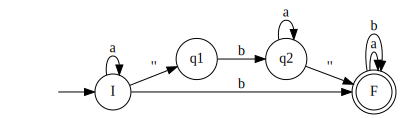

In [3]:
dotObj_nfa(NFA_with_null_edge)

In [4]:
GNFA = mk_gnfa(NFA_with_null_edge)

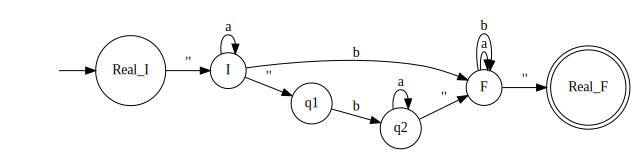

In [5]:
dotObj_nfa(GNFA)

In [6]:
(Gfinal, dotObj_List, RE_of_NFA) = del_gnfa_states(GNFA)
RE_of_NFA

**** Eliminating state I ****
**** Eliminating state F ****
**** Eliminating state q1 ****
**** Eliminating state q2 ****


'(((((a)* b) ((a)* ((a + b))*)) + (((a)* b) ((a + b))*)) + (((a)* b) ((a + b))*))'

Generating LALR tables


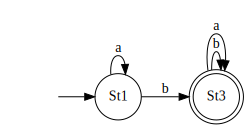

In [7]:
dotObj_dfa( min_dfa(nfa2dfa(re2nfa(RE_of_NFA))) )

Generating LALR tables


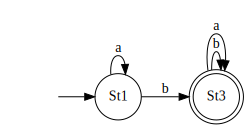

In [8]:
dotObj_dfa( min_dfa(nfa2dfa(re2nfa("a*(ba*+b)(a+b)*"))))

# Great Success !